In [1]:
from mylib.statistic_test import *

code_id = "0880 - Path Integration"
loc = join(figpath, 'Dsp', code_id)
mkdir(loc)

dir_name0 = r'D:\Data\FinalResults\Dsp\Reforming Neural Trajectory Analysis'
pass

d:\Software\Anaconda3\envs\maze\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


        D:\Data\FinalResults\Dsp\0880 - Path Integration is already existed!


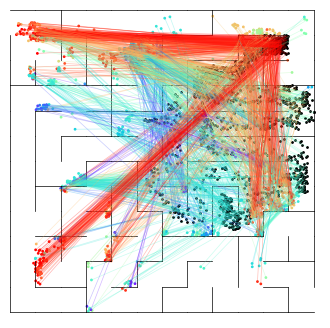

In [2]:
def get_data(mouse: int):
    with open(join(dir_name0, f'{mouse}.pkl'), 'rb') as f:
        data = pickle.load(f)
    return data

def plot(mouse: int, ax: Axes):
    res = get_data(mouse)
    session_traj = res['raw_session_traj']
    route_traj = res['raw_route_traj']
    decoded_nodes_traj = res['raw_decoded_nodes_traj']
    pos_traj = res['raw_nodes_traj']
    lap_traj = res['raw_lap_traj']
    retriev_traj = res['raw_retriv_state_traj']

    idx = np.where((session_traj == 0)&(route_traj == 1)&(retriev_traj == 0))[0]
    session_traj = session_traj[idx]
    route_traj = route_traj[idx]
    decoded_nodes_traj = decoded_nodes_traj[idx]
    pos_traj = pos_traj[idx]
    retriev_traj = retriev_traj[idx]
    lap_traj = lap_traj[idx]

    idx = np.where(lap_traj == lap_traj[0])[0]
    session_traj = session_traj[idx]
    route_traj = route_traj[idx]
    decoded_nodes_traj = decoded_nodes_traj[idx]
    pos_traj = pos_traj[idx]
    retriev_traj = retriev_traj[idx]
    lap_traj = lap_traj[idx]
        
    
    x, y = (pos_traj-1)%48, (pos_traj-1)//48
    x = x + np.random.rand(len(x)) - 0.5
    y = y + np.random.rand(len(y)) - 0.5

    x_predicted = (decoded_nodes_traj-1)%48 + np.random.rand(len(x)) - 0.5
    y_predicted = (decoded_nodes_traj-1)//48 + np.random.rand(len(y)) - 0.5


    D = GetDMatrices(1, 48)
    d = D[pos_traj-1, 2303]
    d = (d - np.min(d)) / (np.max(d) - np.min(d)) - 1e-8
    colors = sns.color_palette("rainbow", as_cmap=True)(d)
    ax.scatter(
        x, y, c='k', s=1, edgecolors=None
    )
    ax.scatter(
        x_predicted, y_predicted, c=colors, s=1, edgecolors=None
    )

    for i in range(len(x)):
        ax.plot([x[i], x_predicted[i]], [y[i], y_predicted[i]], c=colors[i], linewidth=0.5, alpha=0.3)
    ax.axis([-0.5, 48.5, 48.5, -0.5])
    
fig = plt.figure(figsize=(4,4))
ax = Clear_Axes(plt.axes())
DrawMazeProfile(axes=ax, maze_type=1, linewidth=0.5, color='k')
plot(10212, ax)
plot(10224, ax)
plot(10227, ax)
plot(10232, ax)
plt.show()